In [1]:
import cv2
import numpy as np
import dlib
from math import hypot
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as lite

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("E:/eye_blink_detection/shape_predictor_68_face_landmarks.dat")

In [3]:
def midpoint(p1 ,p2):
    return int((p1.x + p2.x)/2), int((p1.y + p2.y)/2)

font = cv2.FONT_HERSHEY_PLAIN

def get_blinking_ratio(eye_points, facial_landmarks,frame):
    left_point = (facial_landmarks.part(eye_points[0]).x, facial_landmarks.part(eye_points[0]).y)
    right_point = (facial_landmarks.part(eye_points[3]).x, facial_landmarks.part(eye_points[3]).y)
    center_top = midpoint(facial_landmarks.part(eye_points[1]), facial_landmarks.part(eye_points[2]))
    center_bottom = midpoint(facial_landmarks.part(eye_points[5]), facial_landmarks.part(eye_points[4]))

    hor_line = cv2.line(frame, left_point, right_point, (0, 255, 0), 2)
    ver_line = cv2.line(frame, center_top, center_bottom, (0, 255, 0), 2)

    hor_line_lenght = hypot((left_point[0] - right_point[0]), (left_point[1] - right_point[1]))
    ver_line_lenght = hypot((center_top[0] - center_bottom[0]), (center_top[1] - center_bottom[1]))

    ratio = hor_line_lenght / ver_line_lenght
    #ratio=ver_line_lenght
    return ratio


   #if blinking_ratio>4:
            #take_screenshot
        #else:
            #wait
            #cv2.putText(frame,"Take_screenshot: {}".format(blinking_ratio), (20, 20), font, 2, (255, 0, 0),2)
        #if blinking_ratio<4:
            #cv2.putText(frame, "Eyelids_open: {}".format(blinking_ratio), (20, 20), font,2, (255, 0, 0),2)
        #plt.imshow(frame)
    #cv2.imshow("Frame", frame)
    

3.156324810767936
3.1571841634594953
3.054901016083621
2.819454667788012
3.0896454739376313
2.992667184467857
3.0559335366253695
3.032125663329899
2.9648172258655268
2.972143329897312
2.815132994090434
2.916931309805829
3.0125400119558834
3.0173887526520726
2.8814120595565162
3.064780774868835
2.9528922186882554
3.0342488077721663
2.942298397663426
2.9409435684620107
2.8154337250829453
3.0488172594758924
3.3077324153648124
4.095961325585165
4.1857448932020525
4.398345461384034
4.287472082104463
5.3824745838377055
4.725556326072802
4.987665382764655
4.53422405812038
3.836307120738337
3.5183640866959935
3.3361543149776596
3.379848964475321
3.183908246970376
3.192654213849467
3.331885764263615
3.3280809176780197
3.0576860537074078
3.1886194725779102
3.133631557448355
3.110843306856975
3.1286517961334237
2.990160462681519
3.178243943176353
3.007609375483522
2.8577580232493514
2.985678250345096
3.033094258624382
2.814200289107892
2.9881525182998345
3.1259665881439958
2.998203415330569
3.154

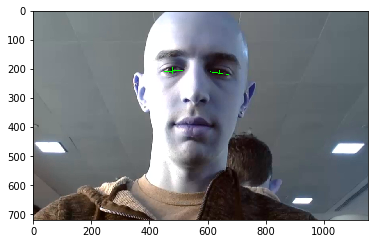

In [4]:


def build_model():
    
    capture = cv2.VideoCapture("E:/eye_blink_detection/blink_detection_demo.mp4")
    frames_num = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

    ratio=[]
    for i in range(frames_num):
        capture.grab()
        success, frame = capture.retrieve()
        if not success:
            continue
    
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)
        for face in faces:
        #x, y = face.left(), face.top()
        #x1, y1 = face.right(), face.bottom()
        #cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)

            landmarks = predictor(gray, face)
            #print(landmarks)
            left_eye_ratio = get_blinking_ratio([36, 37, 38, 39, 40, 41], landmarks,frame)
            right_eye_ratio = get_blinking_ratio([42, 43, 44, 45, 46, 47], landmarks,frame)
            blinking_ratio = (left_eye_ratio + right_eye_ratio) / 2
            print(blinking_ratio)
            #ratio.append(blinking_ratio)
            plt.imshow(frame)
    #return ratio

model=build_model()


In [5]:
#concrete_func =model
# Convert the model
#converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
#tflite_model = converter.convert()

In [8]:
model.save("E:/eye_blink_detection/model_1.h5")

AttributeError: 'NoneType' object has no attribute 'save'

3.156324810767936
3.1571841634594953
3.054901016083621
2.819454667788012
3.0896454739376313
2.992667184467857
3.0559335366253695
3.032125663329899
2.9648172258655268
2.972143329897312
2.815132994090434
2.916931309805829
3.0125400119558834
3.0173887526520726
2.8814120595565162
3.064780774868835
2.9528922186882554
3.0342488077721663
2.942298397663426
2.9409435684620107
2.8154337250829453
3.0488172594758924
3.3077324153648124
4.095961325585165
4.1857448932020525
4.398345461384034
4.287472082104463
5.3824745838377055
4.725556326072802
4.987665382764655
4.53422405812038
3.836307120738337
3.5183640866959935
3.3361543149776596
3.379848964475321
3.183908246970376
3.192654213849467
3.331885764263615
3.3280809176780197
3.0576860537074078
3.1886194725779102
3.133631557448355
3.110843306856975
3.1286517961334237
2.990160462681519
3.178243943176353
3.007609375483522
2.8577580232493514
2.985678250345096
3.033094258624382
2.814200289107892
2.9881525182998345
3.1259665881439958
2.998203415330569
3.154

AttributeError: 'NoneType' object has no attribute 'call'

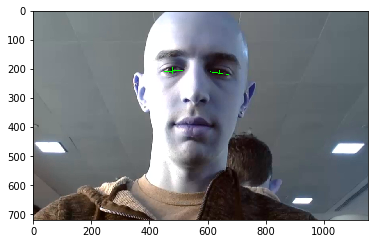

In [7]:
converter = tf.lite.TFLiteConverter.from_keras_model(build_model())
tflite_model = converter.convert()

In [ ]:
#file="E:/eye_blink_detection/model_1.h5"
#tf.keras.models.save_model(model,file)